In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [20]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [21]:
# Save references to each table
Measurment = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
earliest_date = session.query(func.max(Measurment.date)).first()
earliest_date

('2017-08-23',)

In [24]:
# Find the most recent date in the data set.
earliest_date = session.query(Measurment).first()
earliest_date.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x285d7c01400>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

<AxesSubplot:xlabel='Date'>

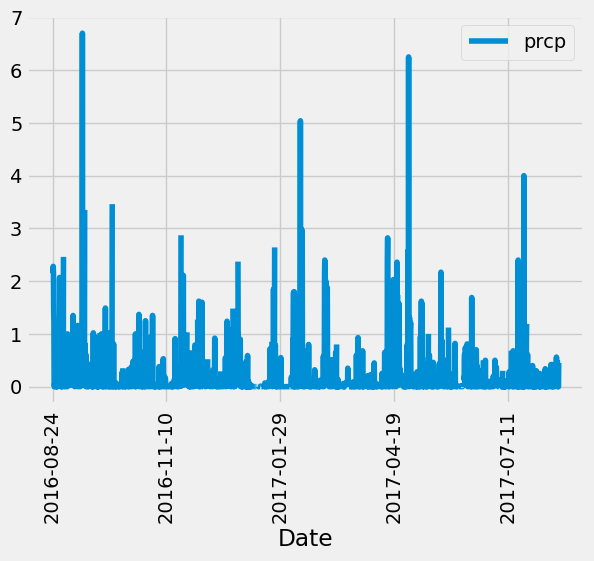

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#for row in session.query(Measurment.id,Measurment.date, Measurment.prcp,Measurment.station).order_by(Measurment.date.desc()).limit(365):
    #print(row)


# Calculate the date one year from the last date in data set.
finaldate = session.query(Measurment.date).order_by(Measurment.date.desc()).first()
year_early = datetime.strptime(finaldate[0], '%Y-%m-%d') - dt.timedelta(days = 365)
year_early


# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurment.date,Measurment.prcp).\
   filter(Measurment.date >= year_early).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(last_12_months, columns =['Date','prcp'] )
prcp_df

# Sort the dataframe by date
prcp_df.sort_values('Date', inplace = True)
#prcp_df.set_index('Date', inplace = True )
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x= 'Date', y = 'prcp', rot = 90)


In [26]:
prcp_df

,Date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(func.count(Station.station)).all()
total_station

[(9,)]

In [29]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurment.station,func.count(Measurment.prcp).label('total')).group_by(Measurment.station).order_by(func.count(Measurment.prcp).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
high_station_query = session.query(Measurment.station,Measurment.tobs).filter(Measurment.station == 'USC00519281').all()
high_station_df = pd.DataFrame(high_station_query, columns = ['Station', 'Temp'])
high_station_df.describe()



,Temp
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


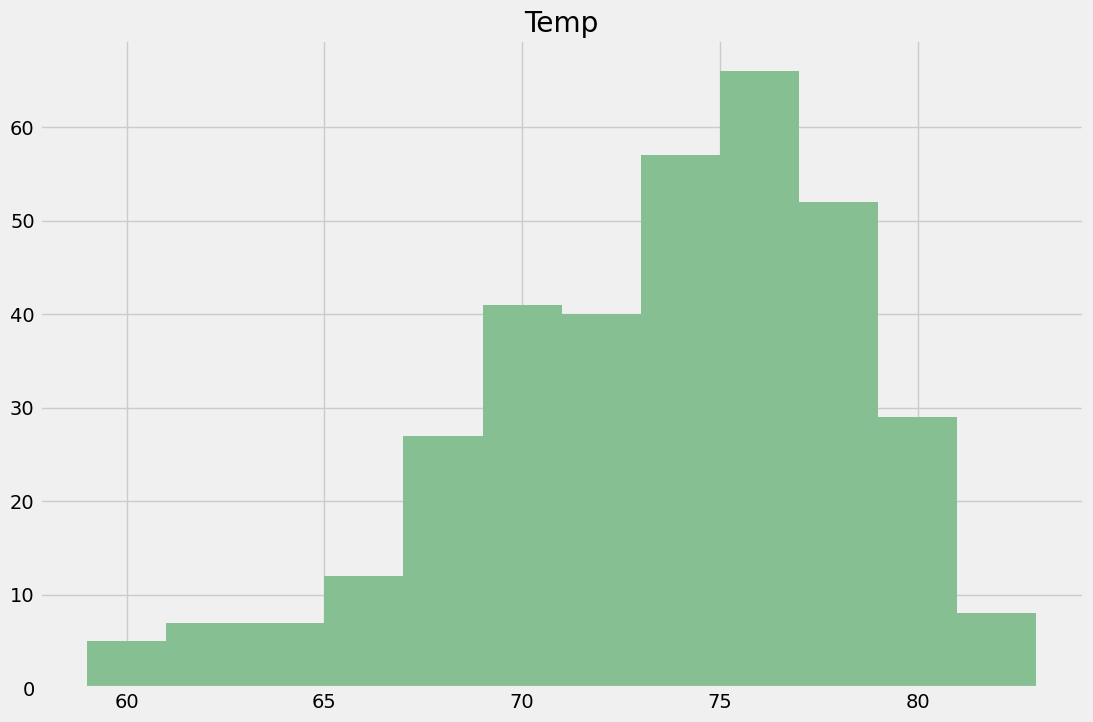

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
high_station_results_query = session.query(Measurment.date,Measurment.station,Measurment.tobs).filter(Measurment.station == 'USC00519281').filter(Measurment.date >= year_early).all()
high_station_results_df = pd.DataFrame(high_station_results_query, columns = ['Date', 'Station', 'Temp'])

high_station_results_df.hist(column='Temp', bins=12, grid=True, figsize=(12,8), color='#86bf91')
plt.show()




In [32]:
# Close Session
session.close()